# Capstone project Data Science

This project notebook is setup and only used for the capstone project of the Data Science course.

In [49]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd
filepath=r"...\9_CapstoneProject\Data-Collisions.csv"
df_raw = pd.read_csv(filepath)
df_raw.head()

...\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df_raw['SEVERITYCODE'].size

194673

### How many attributes

In [5]:
df_raw.columns.size

38

In [6]:
df_raw.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

### Empty items in 'ROADCOND'

In [7]:
df_raw.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [8]:
df_raw[df_raw['ROADCOND'].isna()==True].shape

(5012, 38)

# Exploratory analysis

In [9]:
col=['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','WEATHER','COLLISIONTYPE','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ADDRTYPE']
c=['SEVERITYCODE','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']
df_group_1=df_raw.loc[df_raw['SEVERITYCODE']==1]  # prop damage
df_group_2=df_raw.loc[df_raw.SEVERITYCODE==2]  # injury
df_1=df_group_1[c].groupby(by=["SEVERITYCODE"]).sum()
df_2=df_group_2[c].groupby(by=["SEVERITYCODE"]).sum()

#### Vehicle groups

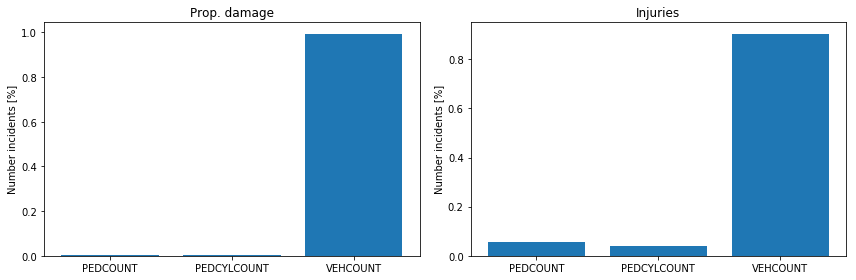

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
x=df_1.columns
y1=np.divide(df_1.to_numpy()[0], sum(df_1.to_numpy()[0]))
y2=np.divide(df_2.to_numpy()[0], sum(df_2.to_numpy()[0]))
ax1.bar(x, y1)
ax2.bar(x, y2)
ax1.title.set_text('Prop. damage')
ax2.title.set_text('Injuries')
ax1.set_ylabel('Number incidents [%]')
ax2.set_ylabel('Number incidents [%]')
plt.tight_layout()

#### Weather conditions

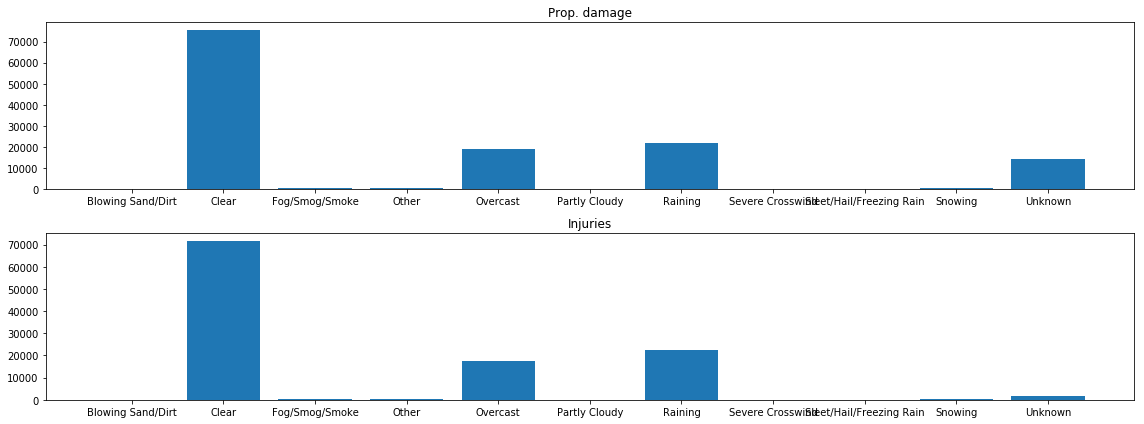

In [11]:
y3=df_group_1.groupby(by=['WEATHER']).sum()['SEVERITYCODE']  # prop. damage
y4=df_group_2.groupby(by=['WEATHER']).sum()['SEVERITYCODE']  # prop. damage
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y3.index, y3)
ax1.title.set_text('Prop. damage')
ax2.bar(y4.index, y4)
ax2.title.set_text('Injuries')
plt.tight_layout()

#### Weather-Light conditions - pedestrian

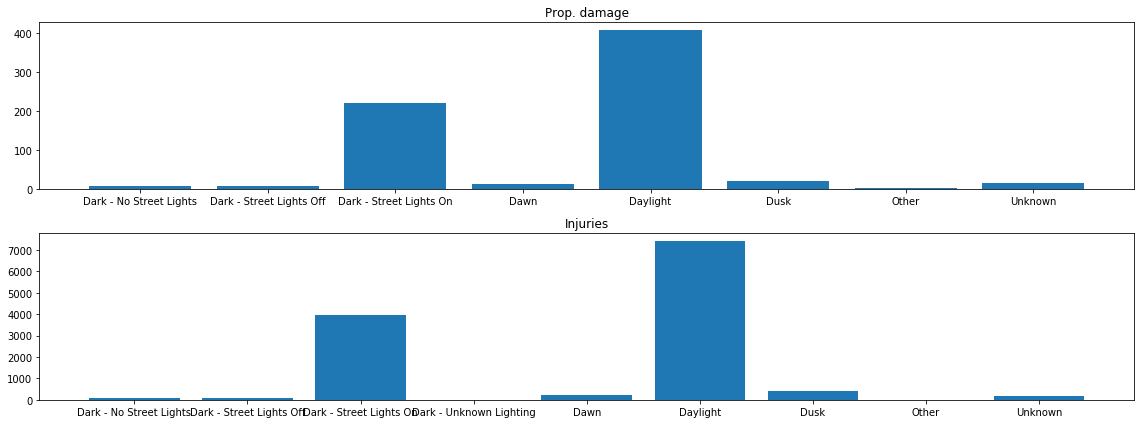

In [12]:
df_ped1=df_group_1[col].loc[df_group_1['PEDCOUNT']>0] # prop damage
df_ped2=df_group_2[col].loc[df_group_2['PEDCOUNT']>0] # injuries
df_cyc1=df_group_1[col].loc[df_group_1['PEDCYLCOUNT']>0]
df_cyc2=df_group_2[col].loc[df_group_2['PEDCYLCOUNT']>0]
df_veh1=df_group_1[col].loc[df_group_1['VEHCOUNT']>0]
df_veh2=df_group_2[col].loc[df_group_2['VEHCOUNT']>0]


# Split into severity
y5=df_ped1.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE'] 
y6=df_ped2.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE'] 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y5.index, y5)
ax1.title.set_text('Prop. damage')
ax2.bar(y6.index, y6)
ax2.title.set_text('Injuries')
plt.tight_layout()

#### Weather-Light conditions - cycles

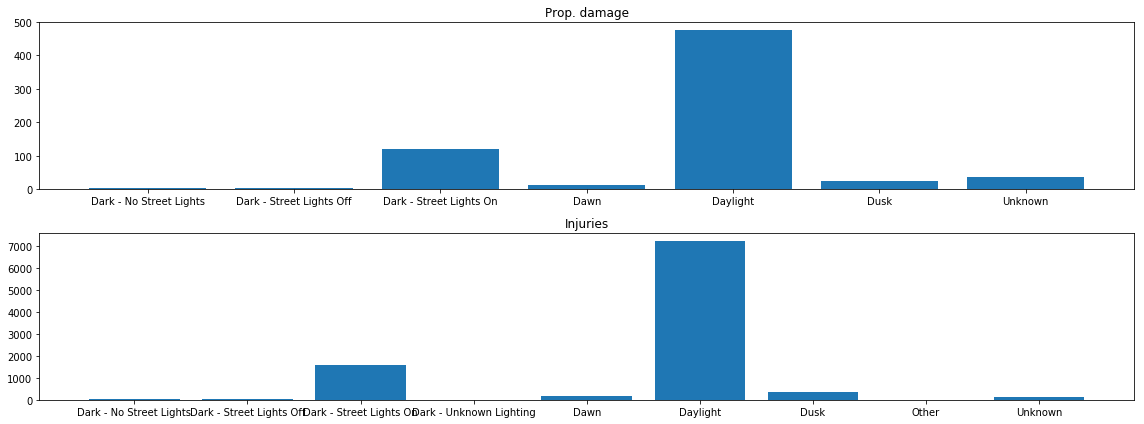

In [13]:
# Split into severity
y7=df_cyc1.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE'] 
y8=df_cyc2.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE'] 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y7.index, y7)
ax1.title.set_text('Prop. damage')
ax2.bar(y8.index, y8)
ax2.title.set_text('Injuries')
plt.tight_layout()

#### Weather-Light conditions - vehicle

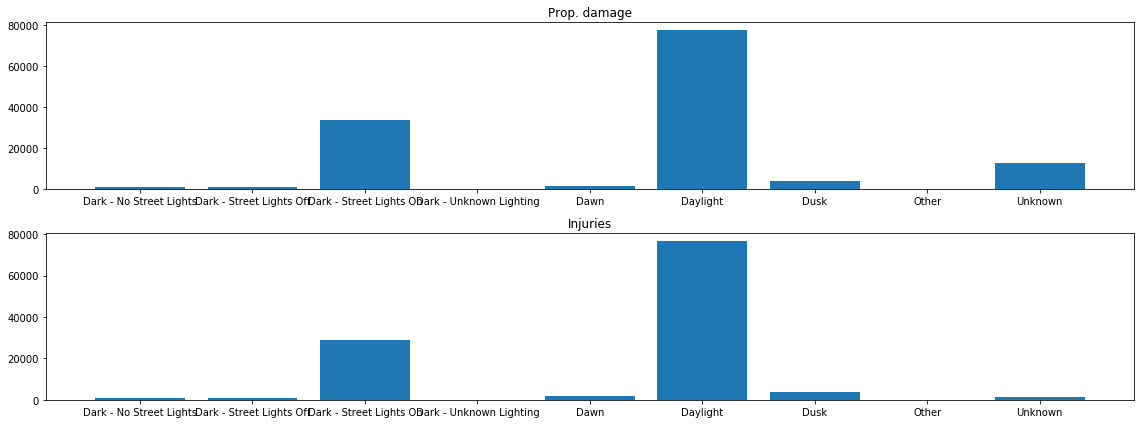

In [14]:
# Split into severity
y7=df_veh1.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE'] 
y8=df_veh2.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE'] 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y7.index, y7)
ax1.title.set_text('Prop. damage')
ax2.bar(y8.index, y8)
ax2.title.set_text('Injuries')
plt.tight_layout()

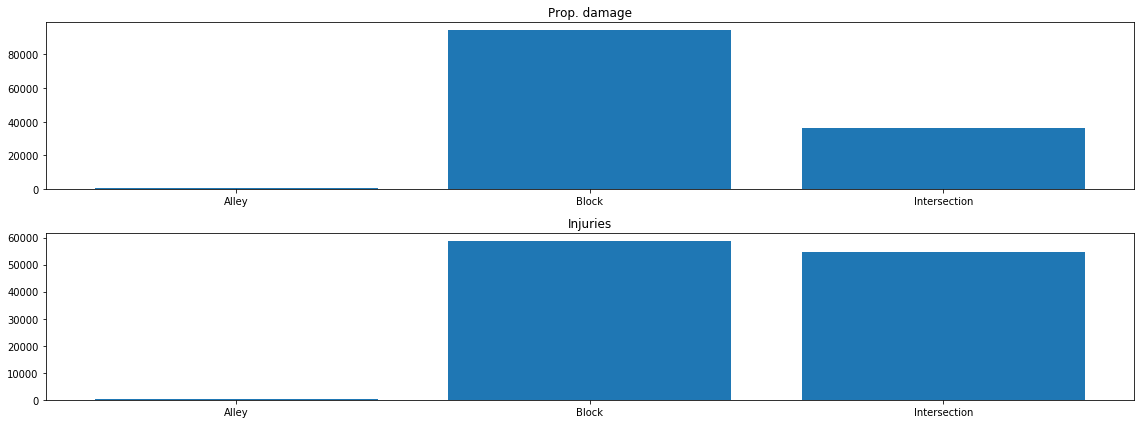

In [15]:
y9=df_veh1.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE'] 
y10=df_veh2.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE'] 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y9.index, y9)
ax1.title.set_text('Prop. damage')
ax2.bar(y10.index, y10)
ax2.title.set_text('Injuries')
plt.tight_layout()

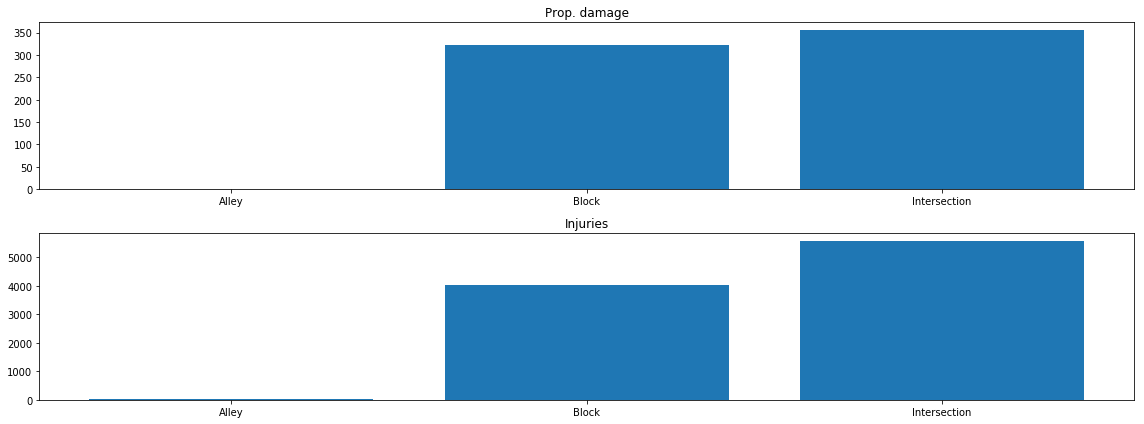

In [16]:
y11=df_cyc1.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE'] 
y12=df_cyc2.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE'] 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y11.index, y11)
ax1.title.set_text('Prop. damage')
ax2.bar(y12.index, y12)
ax2.title.set_text('Injuries')
plt.tight_layout()

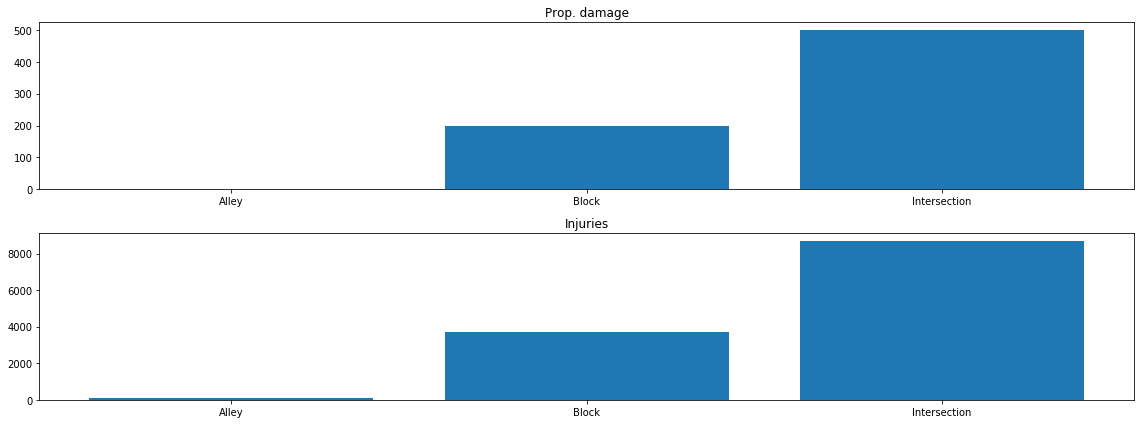

In [17]:
y13=df_ped1.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE'] 
y14=df_ped2.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE'] 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y13.index, y13)
ax1.title.set_text('Prop. damage')
ax2.bar(y14.index, y14)
ax2.title.set_text('Injuries')
plt.tight_layout()

# Data pre-processing

In [18]:
df_raw.columns
cols=['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','ADDRTYPE']

### Label encoding
https://pbpython.com/categorical-encoding.html

In [19]:
cleanup={'ROADCOND': {'Dry':0, 'Wet':1, 'Unknown':2,'Ice':3, 'Snow/Slush':4, 'Other':5, 'Standing Water':6, 'Sand/Mud/Dirt':7,'Oil':8}, 'LIGHTCOND':{'Daylight':0,'Dark - Street Lights On':1, 'Unknown': 2, 'Dusk':3, 'Dawn':4, 'Dark - No Street Lights':5, 'Dark - Street Lights Off':6, 'Other':7, 'Dark - Unknown Lighting': 8},'WEATHER':{'Clear':0,'Raining':1,'Overcast':2,'Unknown':3,'Snowing':4,'Other':5,'Fog/Smog/Smoke':6,'Sleet/Hail/Freezing Rain':7,'Blowing Sand/Dirt':8,'Severe Crosswind':9,'Partly Cloudy':10},'COLLISIONTYPE':{'Parked Car':0,'Angles':1,'Rear Ended':2,'Other':3,'Sideswipe':4,'Left Turn':5, 'Pedestrian':6,'Cycles':7,'Right Turn':8,'Head On':9},'ADDRTYPE':{'Alley':0,'Block':1,'Intersection':2}
}
cleanup

{'ROADCOND': {'Dry': 0,
  'Wet': 1,
  'Unknown': 2,
  'Ice': 3,
  'Snow/Slush': 4,
  'Other': 5,
  'Standing Water': 6,
  'Sand/Mud/Dirt': 7,
  'Oil': 8},
 'LIGHTCOND': {'Daylight': 0,
  'Dark - Street Lights On': 1,
  'Unknown': 2,
  'Dusk': 3,
  'Dawn': 4,
  'Dark - No Street Lights': 5,
  'Dark - Street Lights Off': 6,
  'Other': 7,
  'Dark - Unknown Lighting': 8},
 'WEATHER': {'Clear': 0,
  'Raining': 1,
  'Overcast': 2,
  'Unknown': 3,
  'Snowing': 4,
  'Other': 5,
  'Fog/Smog/Smoke': 6,
  'Sleet/Hail/Freezing Rain': 7,
  'Blowing Sand/Dirt': 8,
  'Severe Crosswind': 9,
  'Partly Cloudy': 10},
 'COLLISIONTYPE': {'Parked Car': 0,
  'Angles': 1,
  'Rear Ended': 2,
  'Other': 3,
  'Sideswipe': 4,
  'Left Turn': 5,
  'Pedestrian': 6,
  'Cycles': 7,
  'Right Turn': 8,
  'Head On': 9},
 'ADDRTYPE': {'Alley': 0, 'Block': 1, 'Intersection': 2}}

In [20]:
df=df_raw[cols]
df.replace(cleanup, inplace=True)
df.head(3)
df.columns

C:\Users\JSCU\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


Index(['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE',
       'ADDRTYPE'],
      dtype='object')

In [21]:
df_filt=df.dropna()
df_filt['SEVERITYCODE'].size

187504

#### Correlation features

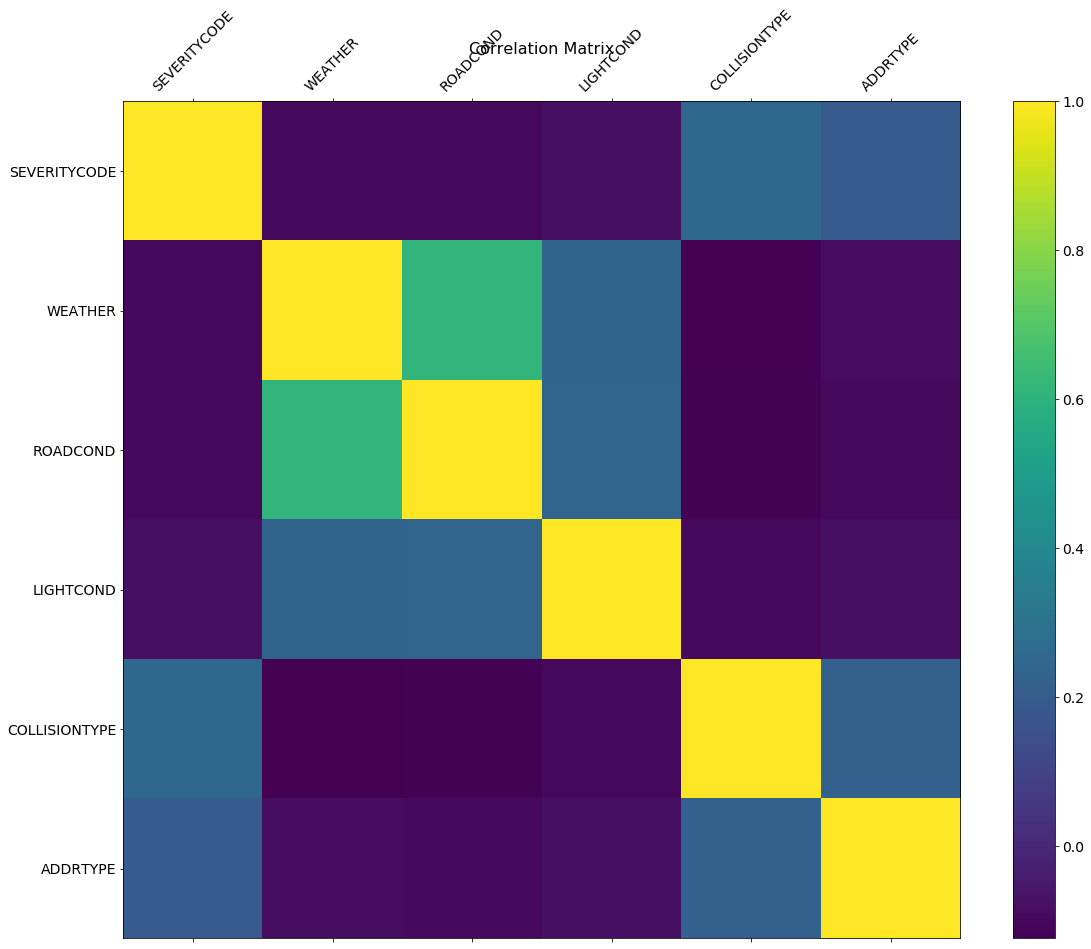

In [22]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_filt.corr(), fignum=f.number)
plt.xticks(range(df_filt.shape[1]), df_filt.columns, fontsize=14, rotation=45)
plt.yticks(range(df_filt.shape[1]), df_filt.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Label balancing

In [23]:
df_maj=df_filt[df_filt['SEVERITYCODE']==1]
df_min=df_filt[df_filt['SEVERITYCODE']==2]
print([df_maj.SEVERITYCODE.size,df_min.SEVERITYCODE.size])

[130634, 56870]


In [24]:
from sklearn.utils import resample
df_maj_downsampled=resample(df_maj,replace=False,n_samples=df_min.SEVERITYCODE.size, random_state=123)

In [25]:
df_ds=pd.concat([df_maj_downsampled,df_min])
df_ds.SEVERITYCODE.value_counts()

2    56870
1    56870
Name: SEVERITYCODE, dtype: int64

# Initialisation

In [26]:
X=df_ds[['WEATHER','ROADCOND','LIGHTCOND','WEATHER','COLLISIONTYPE']]
y=df_ds['SEVERITYCODE']

### Normalize

In [27]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:3]

array([[-0.6764867 , -0.58981024,  0.39162356, -0.6764867 ,  0.20429122],
       [-0.6764867 , -0.58981024, -0.57039241, -0.6764867 , -0.24714907],
       [-0.6764867 , -0.58981024, -0.57039241, -0.6764867 , -1.15002966]])

### Train-test split

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score, f1_score, accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90992, 5) (90992,)
Test set: (22748, 5) (22748,)


# Train models

### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

Nearest neighbour there is a pre-step to figure out how many clusters. As I fully want the test set as confirmation I split the training set up into test/train once more just for KNN. ONLY USED FOR CLUSTER NO. ESTIMATION!

In [30]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split( X_train, y_train, test_size=0.2, random_state=4)

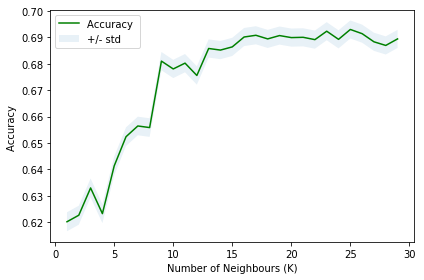

In [31]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_KNN,y_train_KNN)
    yhat=neigh.predict(X_test_KNN)
    mean_acc[n-1] = accuracy_score(y_test_KNN, yhat)
    std_acc[n-1]=np.std(yhat==y_test_KNN)/np.sqrt(yhat.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

Found that clusters=15 best!

In [32]:
neigh = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
pTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
pTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Support vector machine

In [34]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

C:\Users\JSCU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Logistic regression (takes long time to run)

In [43]:
from sklearn.linear_model import LogisticRegression
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X_train, y_train, test_size=0.2, random_state=4)

l=[1,3,6,9]
mean_acc = np.zeros((len(l)))
std_acc = np.zeros((len(l)))
ConfustionMx = [];
for n in range(len(l)):
    LR = LogisticRegression(C = l[n], solver='liblinear').fit(X_train_LR,y_train_LR)
    yhat = LR.predict(X_test_LR)
    yhat_prob = LR.predict_proba(X_test_LR)
    #print("Logistic Regression evaluation F1-score: ", f1_score(y_test_LR, yhat, average='weighted') )
    
    mean_acc[n] = accuracy_score(y_test_LR, yhat)
    std_acc[n]=np.std(yhat==y_test_LR)/np.sqrt(yhat.shape[0])
"""
plt.plot(range(0,len(l)),mean_acc,'g')
plt.fill_between(range(0,len(l)),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
"""

"\nplt.plot(range(0,len(l)),mean_acc,'g')\nplt.fill_between(range(0,len(l)),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)\nplt.legend(('Accuracy ', '+/- std'))\nplt.ylabel('Accuracy ')\nplt.xlabel('Number of Nabors (K)')\nplt.tight_layout()\nplt.show()\n"

The regularization parameter C = 6 appears to fit best.

In [44]:
LR = LogisticRegression(C = 6, solver='liblinear').fit(X_train,y_train)

# Model evaluation

### KNN

In [45]:
yhat=neigh.predict(X_test)
f1score_KNN=round(f1_score(y_test, yhat, average='weighted'),2)
jscore_KNN=round(jaccard_similarity_score(y_test, yhat),2)
print("KNN's evaluation F1-score: ", "{:10.2f}".format(f1score_KNN) )
print("KNN's evaluation Jaccard-score: ", "{:10.2f}".format(jscore_KNN))

KNN's evaluation F1-score:        0.67
KNN's evaluation Jaccard-score:        0.67


C:\Users\JSCU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### Decision tree

In [46]:
yhat = pTree.predict(X_test)
f1score_DT=round( f1_score(y_test, yhat, average='weighted'),2)
jscore_DT=round(jaccard_similarity_score(y_test, yhat) ,2)
print("DecisionTrees's F1-score: ",  "{:10.2f}".format(f1score_DT))
print("DecisionTrees's  evaluation Jaccard-score: ","{:10.2f}".format(jscore_DT) )

DecisionTrees's F1-score:        0.70
DecisionTrees's  evaluation Jaccard-score:        0.70


C:\Users\JSCU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### Logistic regression (takes long time to run)

In [47]:
from sklearn.metrics import log_loss
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

f1score_LR=round(f1_score(y_test, yhat, average='weighted'),2)
jscore_LR=round( jaccard_similarity_score(y_test, yhat) ,2)
lscore_LR=round(log_loss(y_test, yhat_prob),2)
print("Logistic Regression evaluation F1-score: ", "{:10.2f}".format(f1score_LR) )
print("Logistic Regression evaluation Jaccard-score: ", "{:10.2f}".format(jscore_LR))
print("Logistic Regression evaluation Logloss-score: ",  "{:10.2f}".format(lscore_LR))

Logistic Regression evaluation F1-score:        0.59
Logistic Regression evaluation Jaccard-score:        0.60
Logistic Regression evaluation Logloss-score:        0.65


C:\Users\JSCU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### SVM

In [48]:
yhat = clf.predict(X_test)

f1score_SVM=round(f1_score(y_test, yhat, average='weighted') ,2)
jscore_SVM=round(jaccard_similarity_score(y_test, yhat),2)
print("SVM evaluation F1-score: ",  "{:10.2f}".format(f1score_SVM))
print("SVM evaluation Jaccard-score: ",  "{:10.2f}".format(jscore_SVM))

SVM evaluation F1-score:        0.68
SVM evaluation Jaccard-score:        0.68


C:\Users\JSCU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


The end